# The Risk of Automation in The United States


## Group Members:
Wesley Partridge - PID: A12791650   - Contributions: Proposal, Math Model, Coding, Data Visualization

Broderick Higby  - PID: A14247031   - Contributions: Proposal, Cleaning Data, Merging Data, Research

Sumedha Gupta    - PID: A12603503    - Contributions: Competition Presentation, Research and Conclusion

Gurpreet Dhillon - PID: A14220554 - Contributions: Proposal, Analysis and Conclusion

Rodrigo Efraim - PID: A13334006 - Contributions: Proposal, Analysis and Conclusion

In [1]:
#Research Question: How severely will the potential future automation of jobs affect 
#the future economic landscape of the United States? Where could this automation occur
#and why might some states be more vulnerable?

# Loading and Cleaning National BLS Statistics Datasets 

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize


In [3]:
#Data Source 1: The Occupational Employment Statistics (OES) program conducts a semi-annual mail survey
#designed to produce estimates of employment and wages for specific occupations. 
#The OES program collects data on wage and salary workers in nonfarm establishments in order 
#to produce employment and wage estimates for about 800 occupations. 
#URL to CSV File: https://catalog.data.gov/dataset/occupational-employment-statistics-employment-and-wages/resource/d61a4e2f-cf45-4074-97f6-19d7b64179ca
#Data Source 2: 
#https://www.oxfordmartin.ox.ac.uk/downloads/academic/The_Future_of_Employment.pdf

In [4]:
# df_states= pd.read_csv('state_M2016_dl.csv')
# df_employ_probs = pd.read_csv('The_Future_of_Employment_Table.csv')
# df_states_sum = pd.read_csv('state_2016_sum_totals.csv')
df_merged = pd.read_csv('merged_dataframe.csv')

In [5]:
df_merged.fillna(0, inplace = True)

In [6]:
#This is the fully merged dataframe containing over 37,500 counts of employed individuals in 702 occupations over 
# 50 states, each has a probabalistic coefficient representing how likely it is that this occipation will be automated
# or 'computerized in the future. These co-efficients funciton as a contextual scale of how difficult it is to automate 
# any one of these occupations. This table also includes a sum of how many individuals are employed in each occupation
# in the United States as a whole. 

#df_merged
#-Wesley 

## Mathematical Model to Calculate 'Risk Coefficient' for Each State:
        This function multiples the amount of individuals employed in each SOC-Coded occupation per U.S. State by the porobabalistic coefficient for that occupation from the Oxford research paper. It then sums these numbers per state, and divides the result by the amount of individuals emplyed in the state to simulate a population. The result is a value which is directly influenced by the scalar valued measure of computerization in the form of the probabalistic coefficients. For example, a state with a high proportion of easily automated or 'high-risk' jobs (p > 0.7) would have a larger risk coefficient.

In [7]:
%%latex
\begin{align}
\frac{\sum\limits_{i= 0}^{number\:of\:jobs} {(Probability\:per\:Job)\cdot(Amount\:of\:People\:Employed\:Per\:Job)}}{(State\:Population)} = {Automation \: Risk \: Coefficient}
\end{align}

<IPython.core.display.Latex object>

In [8]:
# Core function to generate a coefficient for each state that represents how severely they will be impacted by 
# potential future automation. 
def state_coeff(state_name):
    prob_coeff = 0
    for n in range(0, len(df_merged)):
        prob_coeff += (df_merged['Probability'][(df_merged['Rank'] == n)] * (df_merged[state_name][(df_merged['Rank'] == n)])).sum()
        #Divide by the total population of summed values 
    return prob_coeff/(df_merged[state_name].sum())
#-Wesley

In [9]:
#Testing coefficient outputs of model for extreme states
prob_coeff = state_coeff('Alabama')
print(prob_coeff)
prob_coeff = state_coeff('New York')
print(prob_coeff)
prob_coeff = state_coeff('California')
print(prob_coeff)
#-Wesley

0.630106551474
0.56870141395
0.578449722907


In [10]:
states = {'Alabama','Alaska','Arizona','Arkansas','California','Colorado',
         'Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho', 
         'Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana',
         'Maine', 'Maryland','Massachusetts','Michigan','Minnesota',
         'Mississippi', 'Missouri','Montana','Nebraska','Nevada',
         'New Hampshire','New Jersey','New Mexico','New York',
         'North Carolina','North Dakota','Ohio',    
         'Oklahoma','Oregon','Pennsylvania','Rhode Island',
         'South Carolina','South Dakota','Tennessee','Texas','Utah',
         'Vermont','Virginia','Washington','West Virginia',
         'Wisconsin','Wyoming'}
coeffs = []
#-Wesley

In [11]:

for state in states:
    new_coeff = state_coeff(state)
    coeffs.append(new_coeff)
#-Wesley    

In [12]:
zipvars = zip(states, coeffs)
state_dictionary = dict(zipvars)
#-Wesley

# Dictionary of Automation Risk Coefficients per State

In [13]:
#Raw risk coefficient values
state_dictionary

{'Alabama': 0.63010655147379113,
 'Alaska': 0.59016834901024851,
 'Arizona': 0.57684411007880987,
 'Arkansas': 0.60984028756142683,
 'California': 0.57844972290651286,
 'Colorado': 0.57622833313744837,
 'Connecticut': 0.55503735800460896,
 'Delaware': 0.59802280971245292,
 'Florida': 0.61659443732362385,
 'Georgia': 0.5948858251087541,
 'Hawaii': 0.60251817693120913,
 'Idaho': 0.60055809302483387,
 'Illinois': 0.58014629872906354,
 'Indiana': 0.62637588482057704,
 'Iowa': 0.60757228511099981,
 'Kansas': 0.60392354662873737,
 'Kentucky': 0.62217453205761331,
 'Louisiana': 0.62064359840896566,
 'Maine': 0.59417261893484374,
 'Maryland': 0.55066417855439442,
 'Massachusetts': 0.53419296752563394,
 'Michigan': 0.60665444539360414,
 'Minnesota': 0.58011616608692118,
 'Mississippi': 0.62480329131582901,
 'Missouri': 0.60865671798775478,
 'Montana': 0.6179180795740129,
 'Nebraska': 0.60505349443067868,
 'Nevada': 0.65270036308145685,
 'New Hampshire': 0.59300535020302902,
 'New Jersey': 0.575

In [36]:
df_state_dict = pd.DataFrame.from_dict(state_dictionary,orient='index')
df_state_dict = df_state_dict[0]*10
df_state_dict = pd.DataFrame(df_state_dict)
#Transformed Risk Cefficient Values to new range of 10^2 for greater accuracy when mapping the values 
df_state_dict.columns = ['Risk-Coefficient']

In [37]:
sort = df_state_dict.sort_values(['Risk-Coefficient'], ascending = [True])
sort

,Risk-Coefficient
Massachusetts,5.341930
Maryland,5.506642
Connecticut,5.550374
Virginia,5.663753
New York,5.687014
New Jersey,5.756105
Colorado,5.762283
Arizona,5.768441
Washington,5.783998
California,5.784497


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10de74fd0>]], dtype=object)

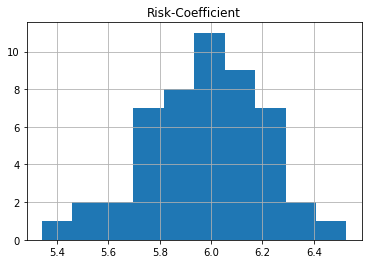

In [38]:
df_state_dict.hist()

## Map of Color Coded States, Ranging from Low-Risk (Light) to High-Risk (Dark)

/Users/WesleyPartridge/anaconda3/envs/python36/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/WesleyPartridge/anaconda3/envs/python36/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


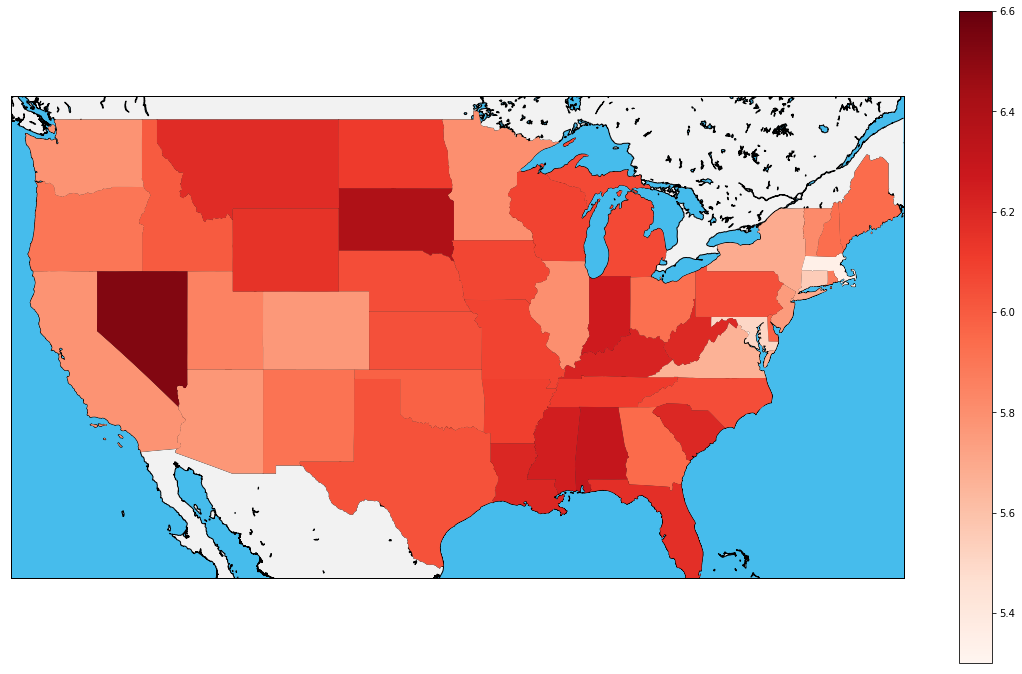

In [40]:
#Render new map using basemap extension of matplotlib, 
#Darker Colors represent a greater risk of automation posed to this state 
fig, ax = plt.subplots(figsize=(20,30))
m = Basemap(resolution='h', # c, l, i, h, f or None
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            #Trace new render frame using latitude and longitude
            llcrnrlon=-125.7, llcrnrlat= 25.26, urcrnrlon= -66.79, urcrnrlat= 50)
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
#Draw map lines using government census border data shape file
m.readshapefile('cb_2016_us_state_20m' , 'states')
df_state_dict['area'] = df_state_dict.index
#Add employment coefficients for each state to dataframe containing shapes.
df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.states],
        'area': [area['NAME'] for area in m.states_info],
        })
# Merge all dataframes for map render
df_poly = pd.merge(df_poly, df_state_dict, on = 'area', how = 'left')
df_poly.columns = ['area','shapes','coeffs']

#select color scheme for map render
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize(vmin=5.3, vmax=6.6)
pc.set_facecolor(cmap(norm(df_poly['coeffs'].fillna(0).values)))
ax.add_collection(pc)

mapper = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['coeffs'])
plt.colorbar(mapper, shrink=0.4)
#-Wesley

## Read in Data for only New York Regions

In [43]:
df_NY = pd.read_csv('Occupational_Employment_Statistics.csv')
df_employ_probs = pd.read_csv('The_Future_of_Employment_Table.csv')
df_employ_NY_merge = pd.read_csv('ny_soc_emp_prob.csv')
#-Wesley

In [44]:
df_employ_NY_merge = df_employ_NY_merge.rename(columns={'Unnamed: 0':'SOC_CODE', 'Unnamed: 4':'Probability'})
df_employ_NY_merge.drop(df_employ_NY_merge.index[:1], inplace = True)
#-Wesley

In [45]:
df_employ_NY_merge.fillna(0, inplace = True)

In [46]:
df_employ_probs = df_employ_probs.drop(['Unnamed: 5', 'Unnamed: 6','Unnamed: 7','Unnamed: 8',], axis = 1)

In [47]:
df_employ_probs.columns = ['Rank', 'Probability', 'Label', 'SOC_CODE', 'Occupation']
df_NY.columns = ['Area Type','Area', 'Area Name', 'SOC_CODE', 'Occupation Title', 'Employment', 'Mean Wage','Median Wage', 'Entry Wage','Experienced Wage']

In [48]:
#Data for New York State Region
#df_employ_NY_merge

In [49]:
df_merge_NY = pd.merge(df_employ_probs,df_NY, how='left',left_on = ['Occupation'], right_on = ['Occupation Title'])
df_merge_NY.fillna(0, inplace = True)
pd.DataFrame.to_csv(df_merge_NY, 'df_merge_ny')

In [50]:
def ny_county_coeff(region_name):
    prob_coeff = 0
    for n in range(0, len(df_employ_NY_merge)):
        prob_coeff += (df_employ_NY_merge['Probability'][(df_employ_NY_merge.index[n])])*(df_employ_NY_merge[region_name][(df_employ_NY_merge.index[n])]).sum()
    return prob_coeff/(df_employ_NY_merge[region_name].sum())
#-Wesley

In [51]:
#Test
ny_county_coeff('Finger Lakes Region')
#int(df_employ_NY_merge['Finger Lakes Region'][(df_employ_NY_merge.index[1])])

0.59535371549457727

In [52]:
regions = {'Capital Region','Central New York Region','Finger Lakes Region','Hudson Valley Region','Long Island Region','Mohawk Valley Region',
         'New York City Region','North Country Region','Southern Tier Region','Western New York Region'}
coeffsNY = []
#-Wesley

In [73]:
for region in regions:
    new_coeff = ny_county_coeff(region)
    coeffs.append(new_coeff)
    #-Wesley

In [74]:
zipvarsNY = zip(regions, coeffs)
region_dictionaryNY = dict(zipvarsNY)
#-Wesley

In [75]:
region_dictionaryNY

{'Capital Region': 0.60055809302483387,
 'Central New York Region': 0.60860432570075007,
 'Finger Lakes Region': 0.60865671798775478,
 'Hudson Valley Region': 0.61137228724360781,
 'Long Island Region': 0.59125297583313574,
 'Mohawk Valley Region': 0.56870141395004115,
 'New York City Region': 0.5948858251087541,
 'North Country Region': 0.61659443732362385,
 'Southern Tier Region': 0.59274147061921945,
 'Western New York Region': 0.62480329131582901}

In [76]:
df_region_dict = pd.DataFrame.from_dict(region_dictionaryNY,orient='index')
df_region_dict['area'] = df_region_dict.index

In [81]:
#Regional Dictionary for New York's Regions
df_region_dict.columns = ['Risk-Coefficient','Region']
df_region_dict = df_region_dict.drop('Region', axis = 1)
df_region_dict = df_region_dict.sort_values(['Risk-Coefficient'], ascending = [True])
df_region_dict

,Risk-Coefficient
Mohawk Valley Region,0.568701
Long Island Region,0.591253
Southern Tier Region,0.592741
New York City Region,0.594886
Capital Region,0.600558
Central New York Region,0.608604
Finger Lakes Region,0.608657
Hudson Valley Region,0.611372
North Country Region,0.616594
Western New York Region,0.624803


## Analysis

We collected data from two sources The Occupational Employment Statistics (OES) and an Oxford research paper. We used the predicted probabilities from the Oxford research paper and matched those probabilities with SOC Codes of each job that was found on the OES data frame that we created. The dataframe contains over 37,500 counts of employed individuals in 702 occupations over 50 states. A mathematical model was used to calculate the predicted risk coefficient for each state which was the probability of computerization per job multiplied by the amount of people employed by that job and lastly, divided by state population. Afterwards, the risk coefficients were utilised to visualize predictions.

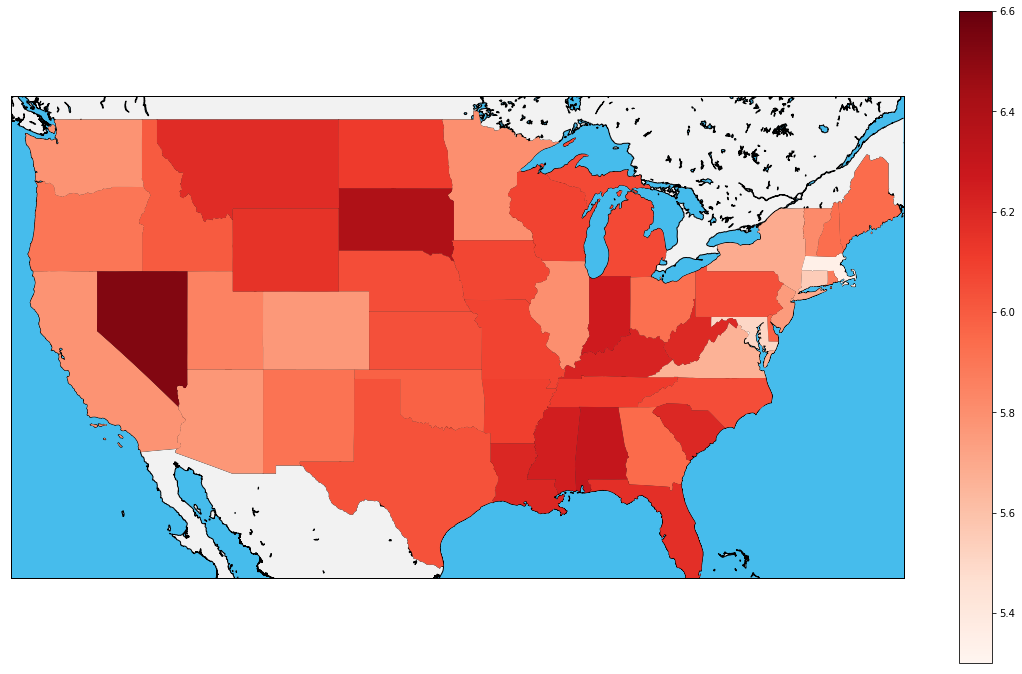

The above figure demonstrates the future impact of computerization on each state. Essentially, a state with a high probability of computerization will have increased unemployment. Moreover, the figure above depicts which states are most likely to be impacted through a choropleth map. Each state has a calculated risk coefficient. This risk coefficient sums up the probability of computerization in regards to all jobs in that state. A higher risk coefficient is an indicator to greater unemployment for that state while a lower risk coefficient is indicative of  decreased unemployment per state.  In the figure, the risk coefficients have a red color gradient associated with it. The highest coefficient is colored dark red while the lowest coefficient is white. We will associate [6.6, 6.2] coefficients intervals as high, (6.2, 5.8] as medium, and (5.8, 5.3] as low. 
The states that fall into the “high category” are Nevada, South Dakota, Alabama, Indiana, Mississippi, Kentucky, Louisiana and South Carolina. These states are predicted to have the highest rates for unemployment in the U.S. States. 
Next, the states that fall into the “medium category” are West Virginia, Montana, Florida, Wyoming, North Dakota, Tennessee, Arkansas, Missouri, Wisconsin, Iowa, Michigan, Nebraska, North Carolina, Pennsylvania, Kansas, Texas, Hawaii, Idaho, Oklahoma, Delaware, Georgia, Maine, New Hampshire, Ohio, New Mexico, Oregon, Rhode Island, Utah, Vermont, Illinois, and Minnesota. 
Lastly, the states that fall into the “low category” are California, Washington, Arizona, Colorado, New York, Virgina, Connecticut, Maryland, and Massachusetts. These states are predicted to have the lowest rates for unemployment in the U.S in the future. 

## Conclusion

We hypothesized that a given location will be strongly correlated to computerization and the quantity of less-skilled, labor jobs in the region. We predicted states like Colorado and Minnesota falling into this category however, based on our collected data, these two states possessed a low risk for unemployment as a consequence of computer automation. Although our project is a glimpse into a possible future where automation is not impeded drastically by some unforeseen hurdles, there are many limitations to our study. First, our probabilities are based on an Oxford research paper which produces predictions based on 2013 trends yet many technological advancements have happened since 2013. Additionally, the Oxford researchers have also acknowledged how probability calculations of this magnitude are extremely difficult. The Oxford research shows that there is a great impact of computerisation on the labour market including literature, and documents the decline of employment in routine intensive occupations. These tasks consist of procedures that can be easily performed by sophisticated algorithms. Not only are the labor tasks being automated but the autonomous driverless cars developed by Google are also an example of how manual tasks in transport and logistics may soon be automated. But there are still ways that could slow down job automation because of regulatory concerns and political activism. Thus, these risk predictions should be considered as a possible outcome and not as fact. 
